# spaceNNtime in AADR dataset

In this notebook I analyse spaceNNtime results on AADR dataset

<a name="AADRHome4"></a>

## Contents

0. [ Library and packages ](#AADRLib)
1. [ Functions ](#AADRFun)
    + 1. [Python Functions](#AADRPyf)
    + 2. [R Functions](#AADRRfu)
2. [ spaceNNtime results in simulations ](#AADRExp)
    + 1. [Presentation of experiment simulated data](#AADRPrs)
    + 2. [Analise results](#AADRAna)
        - Correlation true vs predicted
        - Error
        - Plots
   
<a name="AADRLib"></a>
## 0. Library and packages

In [7]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R

library(ggplot2)
library(cowplot)
library(tidyverse)
library(stringr)
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)

options(dplyr.summarise.inform = FALSE)


[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRFun"></a>
## 1. Functions

<a name="AADRPfu"></a>
### A. Python Functions

<a name="AADRRfu"></a>
### B. R Functions

In [9]:
%%R

rad <- function(x){
    (x * 180)/pi
}

lat_lon_limits <- function(lat, lon){
    latmaxmin = 90.0
    lonmaxmin = 180.0
    distmax   = 40000.0
    dist      = 0.0
    if(lat > latmaxmin){
        dist = dist + (abs(abs(latmaxmin)-abs(lat))/latmaxmin)*distmax
    }else if(lat < -1*latmaxmin){
        dist = dist + (abs(abs(latmaxmin)-abs(lat))/latmaxmin)*distmax
    }
    if(lon > lonmaxmin){
        dist = dist + (abs(abs(lonmaxmin)-abs(lon))/lonmaxmin)*distmax
    }else if(lon < -1*lonmaxmin){
        dist = dist + (abs(abs(lonmaxmin)-abs(lon))/lonmaxmin)*distmax
    }
    if(dist){
        dist = dist + distmax
    }
    dist
}

haversine <- function(lat1, lon1, lat2, lon2){

    #dist = lat_lon_limits(lat2, lon2)
    #if(dist){
    #    return(dist)
    #}

    R = 6371  # radius of Earth in km
    
    phi_1 = lat1 * pi/180
    phi_2 = lat2 * pi/180
    del_phi = (lat2-lat1)* pi/180
    del_lam = (lon2-lon1)* pi/180
    
    a = (sin(del_phi/2)^2) + cos(phi_1) * cos(phi_2) * (sin(del_lam/2)^2)
    
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    round(R * c, 3)
}

In [10]:
d = 110.38662719726562
x = 0
if d > 180:
    if d%360 == 0:
        x = 0
    elif d%360 < 180:
        x = d%180
    elif d%360 >= 180:
        x = d%360-360
elif d < -180:
    if d%360 == 0:
        x = 0
    elif d%360 < 180:
        x = -(d%180)
    elif d%360 >= 180:
        x = 360-d%360



x

0

In [11]:
d = 90+90+90+90
d = 169.9564208984375
if d%360 <= 90:
    print(d, d%360, d%360)
elif d%360 <= 180:
    print(d, d%360, 180-d%360)
elif d%360 <= 270:
    print(d, d%360, 180-d%360)
elif d%360 <= 360:
    print(d, d%360, d%360-360)

169.9564208984375 169.9564208984375 10.0435791015625


In [12]:
%%R

maxkernel <- function(x, weights = NULL){
    if(length(x) == 1){
        x
    }else{
        den <- density(x, kernel=c("gaussian"), weights = weights)
        maxkernel = den$x[den$y==max(den$y)]
        maxkernel[1]
    }
}


[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRExp"></a>
## 2. spaceNNtime results in the AADR dataset

<a name="AADRPrs"></a>
### A. Presentation of experiments ran

In the table below, we can check each simulation experiment that has been run, its attributes and running conditions.

In [13]:
%%R

read.csv("../../files/experiments_AADR.csv", sep = ";")

   exp             nam met cro sta  end  win
1    1            loss   1   1   0  100  100
2    2         general   1   1   0  300  100
3    2         general   1   2   0  300  100
4    3            loss   1   1   0  100  100
5    4          window   1   1   0  250   10
6    4          window   1   2   0  250   10
7    4          window   1   1   0 1000 1000
8    4          window   1   2   0 1000 1000
9    5      prediction   1   1   0  100  100
10   6      prediction   1   1   0  100  100
11   7           nodes   1   1   0  100  100
12   8           nodes   1   1   0  100  100
13   9          modern   9   1   0  100  100
14  10            tims  10   1   0  300  100
15  10            tims  10   2   0  300  100
16  12   tims_nomodern  12   1   0  300  100
17  13     tims_weight  10   1   0  300  100
18  14            tims  10   1   0 1000 1000
19  15 contextpenalize  15   1   0  100  100
20  16 contextpenalize  15   1   0  100  100
21  17 contextpenalize  15   1   0  100  100
22  18 con


[<img src="arrow.png" width="100" style="float: left;">](#AADRHome4) &nbsp;

&nbsp;

<a name="AADRAna"></a>
### E. Analise results

For each experiment, there is a `pred.txt` file which contains all necessary information to visualize results:

In [16]:
%%R

read.table("../../sandbox/AADR/2/pred_1_0_100000000.txt", header = T) %>%
    head()

   sim exp     nam typ cro sta       end gro    ind idx   snp      run true_lat
1 AADR   2 general  gt   1   0 100000000   0 I20444 121 40846 15.44674 40.29221
2 AADR   2 general  gt   1   0 100000000   0 I19167 175 40846 15.44674 16.49740
3 AADR   2 general  gt   1   0 100000000   0 I16425 268 40846 15.44674 49.49715
4 AADR   2 general  gt   1   0 100000000   0     BS 313 40846 15.44674 36.50000
5 AADR   2 general  gt   1   0 100000000   0 I15742 398 40846 15.44674 43.53079
6 AADR   2 general  gt   1   0 100000000   0 I26741 399 40846 15.44674 45.55101
    true_lon pred_lat   pred_lon diff_space true_tim pred_tim  diff_time
1  45.130679 51.55471   7.085716  3153.5457     2622 2463.903   158.0972
2 -88.904960 41.95430  39.007408 11606.1840     4891 4432.179   458.8208
3  -2.506461 46.26196   3.915959   598.6690     4929 2493.321  2435.6790
4 117.900000 46.75354 120.432007  1159.2284     9125 6071.009  3053.9912
5  16.260044 47.67028  13.733919   500.4175     1232 2434.110 -1202.1096
6 

In [17]:
%%R

read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
    head()

                 indivi master  datmet datmea datstd
1 Ne30_genotyping_noUDG   NE30  Direct   9896    121
2 Ne61_genotyping_noUDG   NE61  Direct   3421     23
3 Ne35_genotyping_noUDG   NE35  Direct   8990     72
4                I17622 I17622 Context   3050    173
5                I13833 I13833 Context    325    101
6                 I3931  I3931  Direct   7858     45
                            locate  countr      latitu      longit
1                Nepal,__Kathmandu   China       45.96      126.23
2                Nepal,__Kathmandu   China       45.88      126.22
3                Nepal,__Kathmandu   China       45.91      125.95
4                Southwest,__Dukat Albania      40.295 19.49027778
5 Barç__(Southeast,__Korça__Basin) Albania   40.625278   20.801111
6                         Aknashen Armenia 40.10093333 44.29051667
                                    warnin timind sntind
1                                       ..  FALSE   TRUE
2                                       ..  FA

In [19]:
%%bash

ls ../../sandbox/AADR/4/pred_1_0*

../../sandbox/AADR/4/pred_1_0_1000000000_1000000000.txt
../../sandbox/AADR/4/pred_1_0_250000000_10000000.txt


In [20]:
%%R -w 1000 -h 1250

#read.table("../../sandbox/AADR/2/pred_1_0_100000000_10000000.txt", header = T) %>%
read.table("../../sandbox/AADR/4/pred_1_0_1000000000_1000000000.txt", header = T) %>%
    select(-c(diff_time, diff_space)) %>%
    gather("stat", "value", c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>% 
    separate(stat, c("truepred", "stat"), sep = "_") %>%
    left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>% 
    mutate(truepred = factor(truepred, levels = c("true", "pred"))) -> df
    
df %>%
    head()

   sim exp    nam typ cro sta        end gro    ind idx   snp      run truepred
1 AADR   4 window  gt   1   0 1000000000   0 I20444 121 93166 14.52318     true
2 AADR   4 window  gt   1   0 1000000000   0 I19167 175 93166 14.52318     true
3 AADR   4 window  gt   1   0 1000000000   0 I16425 268 93166 14.52318     true
4 AADR   4 window  gt   1   0 1000000000   0     BS 313 93166 14.52318     true
5 AADR   4 window  gt   1   0 1000000000   0 I15742 398 93166 14.52318     true
6 AADR   4 window  gt   1   0 1000000000   0 I26741 399 93166 14.52318     true
  stat    value master datmet datmea
1  lat 40.29221 I20444 Direct   2622
2  lat 16.49740 I19167 Direct   4891
3  lat 49.49715 I16425 Direct   4929
4  lat 36.50000     BS Direct   9125
5  lat 43.53079 I15742 Direct   1232
6  lat 45.55101 I26741 Direct   6585
                                          locate           countr    latitu
1                                       Sarukhan          Armenia  40.29221
2                            

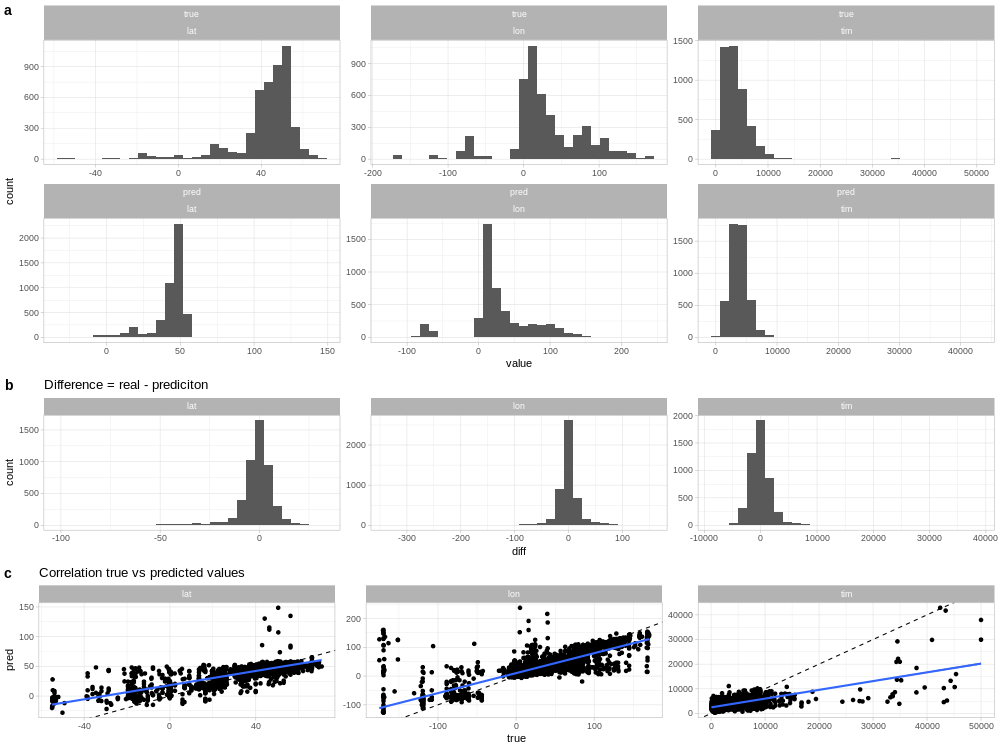

In [21]:
%%R -w 1000 -h 750

plot_grid(
    df %>%        
        ggplot() +
        geom_histogram(aes(x = value), bins = 30) + 
        facet_wrap(truepred~stat, scales = "free") +
        theme_light(),
    df %>%
        spread(truepred, value) %>%
        mutate(diff = true - pred) %>%
        ggplot() +
        geom_histogram(aes(x = diff), bins = 30) + 
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Difference = real - prediciton"),
    df %>%
        spread(truepred, value) %>%
        ggplot() +
        geom_point(aes(x = true, y = pred)) +
        geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
        geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true, y = pred)) +
        facet_wrap(.~stat, scales = "free") +
        theme_light() +
        ggtitle("Correlation true vs predicted values"),
    
    ncol = 1, labels = "auto", rel_heights = c(2, 1, 1)
) -> plot

plot


In [22]:
%%R

df %>% 
    group_by(stat) %>%
    spread(truepred, value) %>%
    summarize(mean_pred = mean(pred), mean_true = mean(true), mean_diff = mean(true-pred), sqrtdiff = mean(sqrt((true-pred)^2))) %>%
    as.data.frame() %>%
    print()

  stat  mean_pred  mean_true mean_diff   sqrtdiff
1  lat   42.98136   41.19848 -1.782881    5.88387
2  lon   28.76931   26.82792 -1.941381   14.72118
3  tim 3842.79721 3902.73262 59.935407 1503.47048


In [25]:
%%R

get_diff_data <- function(exp, pre, cro, sta, end, win = 0, lab = "all"){
    if(win == 0){
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = "")
    }else{
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, "_", win, ".txt", sep = "")
    }
    read.table(file, header = T) %>%
            mutate(extendedexp = paste(exp, cro, format(as.numeric(sta), scientific = FALSE, trim = TRUE), 
                                                 format(as.numeric(end), scientific = FALSE, trim = TRUE), lab, sep = "_")) -> df
    
    if(pre == "space"){
        df %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon)) %>%
            rename(space = diff_space) %>%
            gather("stat", "value", c(space)) -> df
    }else if(pre == "time"){
        df %>%
            select(-c(true_tim,  pred_tim)) %>%
            rename(time = diff_time) %>%
            gather("stat", "value", c(time)) -> df

    }else{
        df %>%
            select(-c(true_lat, true_lon, pred_lat, pred_lon, true_tim,  pred_tim)) %>%
            rename(time = diff_time, space = diff_space) %>%
            gather("stat", "value", c(time, space)) -> df
            
    }
     df %>%
        left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
                select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>%
            ######################################REMOVE MODERN INDIVIDUALS#######################################    
            filter(datmet != "Modern") %>%
            mutate(value = as.numeric(value),
                   snp   = as.numeric(snp),
                   run   = as.numeric(run),
                   cro   = as.character(cro),
                   sta   = as.numeric(sta),
                   end   = as.numeric(end)) %>%
            ungroup()
                   
}

    

get_diff_data(2, "sNNt", 1,  "0", "100000000", "0") %>%
    head()

   sim exp     nam typ cro sta   end gro    ind idx   snp      run
1 AADR   2 general  gt   1   0 1e+08   0 I20444 121 40846 15.44674
2 AADR   2 general  gt   1   0 1e+08   0 I19167 175 40846 15.44674
3 AADR   2 general  gt   1   0 1e+08   0 I16425 268 40846 15.44674
4 AADR   2 general  gt   1   0 1e+08   0     BS 313 40846 15.44674
5 AADR   2 general  gt   1   0 1e+08   0 I15742 398 40846 15.44674
6 AADR   2 general  gt   1   0 1e+08   0 I26741 399 40846 15.44674
          extendedexp stat      value master datmet datmea
1 2_1_0_100000000_all time   158.0972 I20444 Direct   2622
2 2_1_0_100000000_all time   458.8208 I19167 Direct   4891
3 2_1_0_100000000_all time  2435.6790 I16425 Direct   4929
4 2_1_0_100000000_all time  3053.9912     BS Direct   9125
5 2_1_0_100000000_all time -1202.1096 I15742 Direct   1232
6 2_1_0_100000000_all time  1098.5635 I26741 Direct   6585
                                          locate           countr    latitu
1                                       Sa

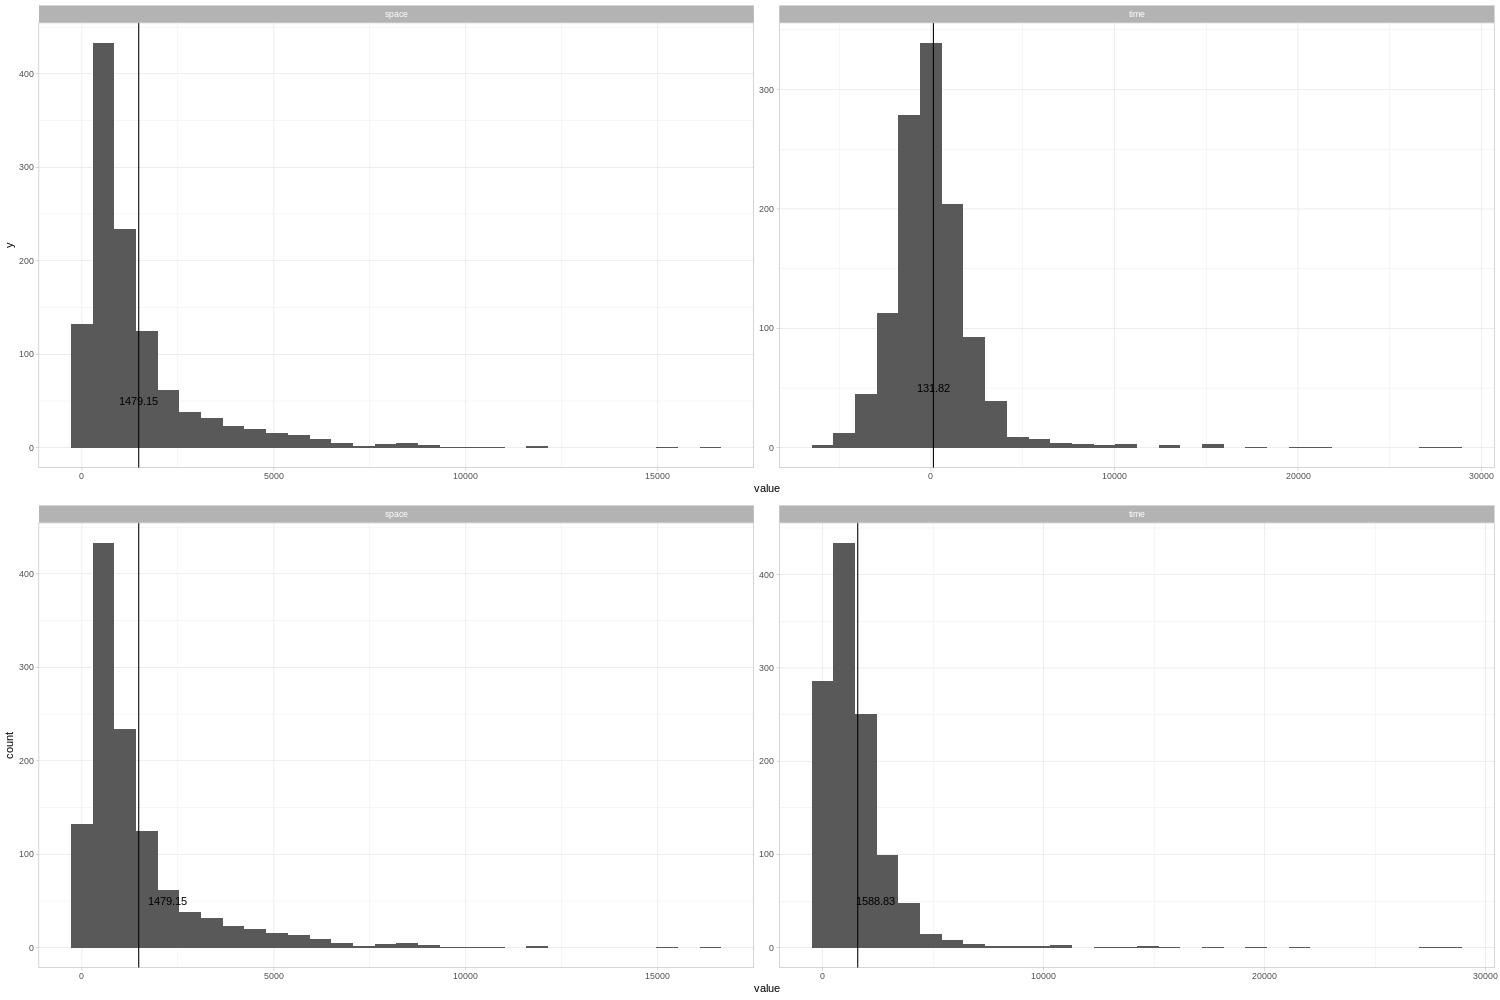

In [27]:
%%R -w 1500 -h 1000

exp = "2"
cro = "1"
sta = "0"
end = "100000000"
win = "0"
pre = "sNNt"


plot_grid(
    get_diff_data(exp, pre, cro, sta, end, win) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean, y = 50, label = round(mean, 2))) +   
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    get_diff_data(exp, pre, cro, sta, end, win) %>%
        mutate(value = sqrt(value^2)) %>%
        ggplot() +
        geom_histogram(aes(x = value), bins = 30) +
        geom_vline(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(xintercept = mean)) +
        geom_text(data = . %>% group_by(stat) %>% summarize(mean = mean(value)), aes(x = mean+(mean*0.5), y = 50, label = round(mean, 2))) +
        ylab("count") +
        facet_wrap(.~stat, scales = "free") +
        theme_light(),
    
    nrow = 2) -> plot

plot

In [30]:
%%R


error_spaceNNtime_all_scenarios <- function(){
    read.csv("../../files/experiments_AADR.csv", sep = ";") -> experiments
    
    all_scenarios = data.frame()
    
    #for(i in 1:(experiments %>% nrow())){
    for(i in c(1:8, 25:28)){
        print(i)
        #print(experiments[i,])
        #sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        cro = experiments %>% pull(cro) %>% .[i]
        sta = experiments %>% pull(sta) %>% .[i]
        sta = as.numeric(sta)*1e6
        end = experiments %>% pull(end) %>% .[i]
        end = as.numeric(end)*1e6
        win = experiments %>% pull(win) %>% .[i]
        win = as.numeric(win)*1e6
        pre = experiments %>% pull(pre) %>% .[i]
        
        c = format(sta, scientific = FALSE, trim = TRUE)
        e = format(end, scientific = FALSE, trim = TRUE)
        w = format(win, scientific = FALSE, trim = TRUE)
        
        
        
        if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", c, "_", e, "_", w, ".txt", sep = ""))){
            all_scenarios = rbind(all_scenarios, 
                                  get_diff_data(exp, pre, cro, c, e, w) %>%
                                              mutate(value = abs(value)) %>%
                                              group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
                                              summarize(mean = mean(value),
                                                        se   = sd(value)/sqrt(n()),
                                                        n    = n(),
                                                        snp  = mean(snp),
                                                        run  = mean(run)) %>%
                                              mutate(exp = factor(exp))
                                         )
        }else{
            for(s in seq(sta, end-win, win)){             
                z = format(s, scientific = FALSE, trim = TRUE)
                y = format(s+win, scientific = FALSE, trim = TRUE)
                if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""))){
                    all_scenarios = rbind(all_scenarios, 
                                          get_diff_data(exp, pre, cro, z, y) %>%
                                              mutate(value = abs(value)) %>%
                                              group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
                                              summarize(mean = mean(value),
                                                        se   = sd(value)/sqrt(n()),
                                                        n    = n(),
                                                        snp  = mean(snp),
                                                        run  = mean(run)) %>%
                                              mutate(exp = factor(exp))
                                         )
                }else{
                    print(paste("the file ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""), " nor ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", e, "_", w, ".txt", sep = ""), " does not exist!", sep = ""))
                }
            }

        
        }
        
    }
    all_scenarios %>% mutate(nn = 1)
}

all_scenarios <- error_spaceNNtime_all_scenarios()
head(all_scenarios)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 25
[1] 26
[1] 27
[1] 28
# A tibble: 6 × 14
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [3]
  exp   cro      sta   end extendedexp nam   typ   stat   mean    se     n   snp
  <fct> <chr>  <dbl> <dbl> <chr>       <chr> <chr> <chr> <dbl> <dbl> <int> <dbl>
1 1     1        0     1e8 1_1_0_1000… loss  gt    space 1906.  29.3  4847 40846
2 1     1        0     1e8 1_1_0_1000… loss  gt    time  1564.  32.5  4847 40846
3 2     1        0     1e8 2_1_0_1000… gene… gt    space 1479.  50.7  1164 40846
4 2     1        0     1e8 2_1_0_1000… gene… gt    time  1589.  62.9  1164 40846
5 2     1        1e8   2e8 2_1_100000… gene… gt    space 1741.  49.5  1746 28999
6 2     1        1e8   2e8 2_1_100000… gene… gt    time  1637.  53.4  1746 28999
# ℹ 2 more variables: run <dbl>, nn <dbl>


In [33]:
%%R

get_all_data <- function(exp, pre, cro, sta, end, win=0){
    if(win == 0){
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, ".txt", sep = "")
    }else{
        file <- paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", sta, "_", end, "_", win, ".txt", sep = "")
    }
    
    read.table(file, header = T) %>%
        #mutate(cro = cro, sta = sta, end = end) %>%
        mutate(extendedexp = paste(exp, cro, format(as.numeric(sta), scientific = FALSE, trim = TRUE), 
                                             format(as.numeric(end), scientific = FALSE, trim = TRUE), 
                                             format(as.numeric(win), scientific = FALSE, trim = TRUE), sep = "_")) %>%
        left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>%
             select(ind = indivi, master, datmet, datmea, locate, countr, latitu, longit, warnin, timind, sntind), by = c("ind")) %>%
        ######################################REMOVE MODERN INDIVIDUALS#######################################    
        filter(datmet != "Modern") -> a
    if(pre == "space"){
        a %>%
            mutate(true_tim = 0, pred_tim = 0, diff_time = 0) -> a
    }
    if(pre == "time"){
        a %>%
            mutate(true_lat = 0, true_lon = 0, pred_lat = 0, pred_lon = 0, diff_space = 0) -> a
    }  

    a %>%             
        mutate(snp   = as.numeric(snp),
               run   = as.numeric(run),
               cro   = as.character(cro),
               sta   = as.numeric(sta),
               end   = as.numeric(end)) %>%
            ungroup()
        
}

get_all_data(2, "sNNt", "1", "0", "100000000", "0") %>%
    head()

   sim exp     nam typ cro sta   end gro    ind idx   snp      run true_lat
1 AADR   2 general  gt   1   0 1e+08   0 I20444 121 40846 15.44674 40.29221
2 AADR   2 general  gt   1   0 1e+08   0 I19167 175 40846 15.44674 16.49740
3 AADR   2 general  gt   1   0 1e+08   0 I16425 268 40846 15.44674 49.49715
4 AADR   2 general  gt   1   0 1e+08   0     BS 313 40846 15.44674 36.50000
5 AADR   2 general  gt   1   0 1e+08   0 I15742 398 40846 15.44674 43.53079
6 AADR   2 general  gt   1   0 1e+08   0 I26741 399 40846 15.44674 45.55101
    true_lon pred_lat   pred_lon diff_space true_tim pred_tim  diff_time
1  45.130679 51.55471   7.085716  3153.5457     2622 2463.903   158.0972
2 -88.904960 41.95430  39.007408 11606.1840     4891 4432.179   458.8208
3  -2.506461 46.26196   3.915959   598.6690     4929 2493.321  2435.6790
4 117.900000 46.75354 120.432007  1159.2284     9125 6071.009  3053.9912
5  16.260044 47.67028  13.733919   500.4175     1232 2434.110 -1202.1096
6  18.746617 45.50764  10.7792

In [34]:
%%R



get_all_data_all_scenarios <- function(){
    read.csv("../../files/experiments_AADR.csv", sep = ";") -> experiments

    all_scenarios = data.frame()
    
    #for(i in 1:(experiments %>% nrow())){
    for(i in c(1:8, 25:28)){
        #for(i in c(4, 34, 35, 36, 37, 38, 39, 40)){
        print(i)
        #sim = experiments %>% pull(sim) %>% .[i]
        exp = experiments %>% pull(exp) %>% .[i]
        pre = experiments %>% pull(pre) %>% .[i]
        cro = experiments %>% pull(cro) %>% .[i]
        sta = experiments %>% pull(sta) %>% .[i]
        sta = as.numeric(sta)*1e6
        end = experiments %>% pull(end) %>% .[i]
        end = as.numeric(end)*1e6
        win = experiments %>% pull(win) %>% .[i]
        win = as.numeric(win)*1e6
        pre = experiments %>% pull(pre) %>% .[i]
        
        c = format(sta, scientific = FALSE, trim = TRUE)
        e = format(end, scientific = FALSE, trim = TRUE)
        w = format(win, scientific = FALSE, trim = TRUE)
        
        if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", c, "_", e, "_", w, ".txt", sep = ""))){
            all_scenarios = rbind(all_scenarios, 
                                  get_all_data(exp, pre, cro, c, e, w) 
                                         )
        }else{
            for(s in seq(sta, end-win, win)){  
                z = format(s, scientific = FALSE, trim = TRUE)
                y = format(s+win, scientific = FALSE, trim = TRUE)
                if(file.exists(paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""))){
                    all_scenarios = rbind(all_scenarios, 
                                          get_all_data(exp, pre, cro, z, y) 
                                         )
                }else{
                    print(paste("the file ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", y, ".txt", sep = ""), " nor ", paste("../../sandbox/AADR/", exp, "/pred_", cro, "_", z, "_", e, "_", w, ".txt", sep = ""), " does not exist!", sep = ""))
                }
            }

        }
    }
    all_scenarios %>%
        mutate(true_lat = as.numeric(true_lat),
               true_lon = as.numeric(true_lon),
               pred_lat = as.numeric(pred_lat),
               pred_lon = as.numeric(pred_lon),
               diff_space = as.numeric(diff_space),
               true_tim = as.numeric(true_tim),
               pred_tim = as.numeric(pred_tim),
               diff_time = as.numeric(diff_time),
               snp   = as.numeric(snp),
               run   = as.numeric(run),
               cro   = as.character(cro),
               sta   = as.numeric(sta),
               end   = as.numeric(end),
               win   = as.numeric(win)) %>%
            ungroup()
}    
    
get_all_data_all_scenarios_df <- get_all_data_all_scenarios()
head(get_all_data_all_scenarios_df)


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 25
[1] 26
[1] 27
[1] 28
   sim exp  nam typ cro sta   end gro    ind idx   snp      run true_lat
1 AADR   1 loss  gt   1   0 1e+08   0 I20444 121 40846 9.460483 40.29221
2 AADR   1 loss  gt   1   0 1e+08   0 I19167 175 40846 9.460483 16.49740
3 AADR   1 loss  gt   1   0 1e+08   0 I16425 268 40846 9.460483 49.49715
4 AADR   1 loss  gt   1   0 1e+08   0     BS 313 40846 9.460483 36.50000
5 AADR   1 loss  gt   1   0 1e+08   0 I15742 398 40846 9.460483 43.53079
6 AADR   1 loss  gt   1   0 1e+08   0 I26741 399 40846 9.460483 45.55101
    true_lon pred_lat   pred_lon diff_space true_tim pred_tim  diff_time
1  45.130679 52.97427   9.935760  2993.3713     2622 3263.349  -641.3491
2 -88.904960 57.44988  23.054911  9711.5280     4891 4356.314   534.6860
3  -2.506461 52.79260   8.523952   851.0732     4929 4018.169   910.8313
4 117.900000 45.98294 125.880066  1246.3502     9125 5282.896  3842.1040
5  16.260044 48.89360  21.197617   706.7106     

In [35]:
%%R

get_all_data_all_scenarios_df %>%
    count(pred_lat < -90, pred_lat > 90, pred_lon < -180, pred_lon > 180)

  pred_lat < -90 pred_lat > 90 pred_lon < -180 pred_lon > 180      n
1          FALSE         FALSE           FALSE          FALSE 293656
2          FALSE         FALSE           FALSE           TRUE      7
3          FALSE          TRUE           FALSE          FALSE   1404
4          FALSE          TRUE           FALSE           TRUE    206
5           TRUE         FALSE           FALSE          FALSE     26
6           TRUE         FALSE           FALSE           TRUE      5
7           TRUE         FALSE            TRUE          FALSE     75


In [36]:
%%R

error_spaceNNtime_mean_windows <- function(all_scenarios, per_chromosome = TRUE){
    if(!per_chromosome){
        all_scenarios %>% mutate(cro = "all") -> all_scenarios
    }
    all_scenarios %>%
        mutate(win = format(end-sta, scientific = FALSE, trim = TRUE))  %>%
        mutate(extendedexp = paste(exp, cro, format(as.numeric(sta), scientific = FALSE, trim = TRUE), 
                                             format(as.numeric(end), scientific = FALSE, trim = TRUE), 
                                             format(as.numeric(win), scientific = FALSE, trim = TRUE), sep = "_")) %>%
        group_by(sim, exp, ind, cro, win) %>%
        summarize(sta = min(sta),
                  end = max(end),
                  nn  = n(),
                  run = mean(run),
                  true_lat = mean(true_lat),
                  true_lon = mean(true_lon),
                  true_tim = mean(true_tim),
                  mean_pred_lat = mean(pred_lat),
                  mean_pred_lon = mean(pred_lon),
                  mean_pred_tim = mean(pred_tim),
                  meaw_pred_lat = weighted.mean(pred_lat, snp),
                  meaw_pred_lon = weighted.mean(pred_lon, snp),
                  meaw_pred_tim = weighted.mean(pred_tim, snp),
                  median_pred_lat = median(pred_lat),
                  median_pred_lon = median(pred_lon),
                  median_pred_tim = median(pred_tim),
                  kernel_pred_lat = maxkernel(pred_lat),
                  kernel_pred_lon = maxkernel(pred_lon),
                  kernel_pred_tim = maxkernel(pred_tim),
                  kernew_pred_lat = maxkernel(pred_lat, snp),
                  kernew_pred_lon = maxkernel(pred_lon, snp),
                  kernew_pred_tim = maxkernel(pred_tim, snp),
                  snp = mean(snp)) %>%
       ungroup() %>%
       mutate(mean_space   = haversine(true_lat, true_lon, mean_pred_lat, mean_pred_lon),
              mean_time    = sqrt((mean_pred_tim-true_tim)^2),
              meaw_space   = haversine(true_lat, true_lon, meaw_pred_lat, meaw_pred_lon),
              meaw_time    = sqrt((meaw_pred_tim-true_tim)^2),
              median_space = haversine(true_lat, true_lon, median_pred_lat, median_pred_lon),
              median_time  = sqrt((median_pred_tim-true_tim)^2),
              kernel_space = haversine(true_lat, true_lon, kernel_pred_lat, kernel_pred_lon),
              kernel_time  = sqrt((kernel_pred_tim-true_tim)^2),
              kernew_space = haversine(true_lat, true_lon, kernew_pred_lat, kernew_pred_lon),
              kernew_time  = sqrt((kernew_pred_tim-true_tim)^2),
              extendedexp = paste(exp, cro, format(as.numeric(sta), scientific = FALSE, trim = TRUE), 
                                            format(as.numeric(end), scientific = FALSE, trim = TRUE), 
                                            format(as.numeric(win), scientific = FALSE, trim = TRUE), sep = "_"),
              nam = "average",
              typ = "gt") %>% 
       as.data.frame() %>%
       select(-c(sim, true_lat, true_lon, mean_pred_lat, mean_pred_lon, meaw_pred_lat, meaw_pred_lon, median_pred_lat, median_pred_lon, kernel_pred_lat, kernel_pred_lon, kernew_pred_lat, kernew_pred_lon, true_tim, mean_pred_tim, meaw_pred_tim, median_pred_tim, kernel_pred_tim, kernew_pred_tim)) %>%
       gather("stat", "diff", mean_space, mean_time, meaw_space, meaw_time, median_space, median_time, kernel_space, kernel_time, kernew_space, kernew_time) %>% 
       separate(stat, into = c("aver", "stat"), sep = "_") %>%
       mutate(extendedexp = paste(extendedexp, aver, sep = "_")) %>% 
       group_by(exp, cro, sta, end, extendedexp, nam, typ, stat) %>%
       filter(nn == max(nn)) %>% 
       summarize(mean = mean(diff), se = sd(diff)/sqrt(n()), n = n(), snp = mean(snp), run = mean(run), nn = mean(nn)) %>% 
       ungroup() 
        
}

In [37]:
%%R

get_all_data_all_scenarios_df %>%
    head()

   sim exp  nam typ cro sta   end gro    ind idx   snp      run true_lat
1 AADR   1 loss  gt   1   0 1e+08   0 I20444 121 40846 9.460483 40.29221
2 AADR   1 loss  gt   1   0 1e+08   0 I19167 175 40846 9.460483 16.49740
3 AADR   1 loss  gt   1   0 1e+08   0 I16425 268 40846 9.460483 49.49715
4 AADR   1 loss  gt   1   0 1e+08   0     BS 313 40846 9.460483 36.50000
5 AADR   1 loss  gt   1   0 1e+08   0 I15742 398 40846 9.460483 43.53079
6 AADR   1 loss  gt   1   0 1e+08   0 I26741 399 40846 9.460483 45.55101
    true_lon pred_lat   pred_lon diff_space true_tim pred_tim  diff_time
1  45.130679 52.97427   9.935760  2993.3713     2622 3263.349  -641.3491
2 -88.904960 57.44988  23.054911  9711.5280     4891 4356.314   534.6860
3  -2.506461 52.79260   8.523952   851.0732     4929 4018.169   910.8313
4 117.900000 45.98294 125.880066  1246.3502     9125 5282.896  3842.1040
5  16.260044 48.89360  21.197617   706.7106     1232 3432.628 -2200.6279
6  18.746617 49.28992  13.574066   569.2032     658

In [38]:
%%R

error_spaceNNtime_mean_windows(get_all_data_all_scenarios_df) -> error_spaceNNtime_mean_windows_per_chro_df

error_spaceNNtime_mean_windows_per_chro_df %>% head()

# A tibble: 6 × 14
  exp   cro     sta    end extendedexp nam   typ   stat   mean    se     n   snp
  <chr> <chr> <dbl>  <dbl> <chr>       <chr> <chr> <chr> <dbl> <dbl> <int> <dbl>
1 1     1         0    1e8 1_1_0_1000… aver… gt    space 1906.  29.3  4847 40846
2 1     1         0    1e8 1_1_0_1000… aver… gt    time  1564.  32.5  4847 40846
3 1     1         0    1e8 1_1_0_1000… aver… gt    space 1906.  29.3  4847 40846
4 1     1         0    1e8 1_1_0_1000… aver… gt    time  1564.  32.5  4847 40846
5 1     1         0    1e8 1_1_0_1000… aver… gt    space 1906.  29.3  4847 40846
6 1     1         0    1e8 1_1_0_1000… aver… gt    time  1564.  32.5  4847 40846
# ℹ 2 more variables: run <dbl>, nn <dbl>


In [39]:
%%R

error_spaceNNtime_mean_windows(get_all_data_all_scenarios_df, FALSE) -> error_spaceNNtime_mean_windows_df

error_spaceNNtime_mean_windows_df %>% head()

# A tibble: 6 × 14
  exp   cro     sta    end extendedexp nam   typ   stat   mean    se     n   snp
  <chr> <chr> <dbl>  <dbl> <chr>       <chr> <chr> <chr> <dbl> <dbl> <int> <dbl>
1 1     all       0    1e8 1_all_0_10… aver… gt    space 1906.  29.3  4847 40846
2 1     all       0    1e8 1_all_0_10… aver… gt    time  1564.  32.5  4847 40846
3 1     all       0    1e8 1_all_0_10… aver… gt    space 1906.  29.3  4847 40846
4 1     all       0    1e8 1_all_0_10… aver… gt    time  1564.  32.5  4847 40846
5 1     all       0    1e8 1_all_0_10… aver… gt    space 1906.  29.3  4847 40846
6 1     all       0    1e8 1_all_0_10… aver… gt    time  1564.  32.5  4847 40846
# ℹ 2 more variables: run <dbl>, nn <dbl>


In [40]:
%%R

plot_errors <- function(all_scenarios_all, exp_to_plot, labels, limits, title, xlab, ylab, ylimspace = c("None", "None"), ylimtime = c("None", "None"), nolegend = TRUE){
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "space") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*1.10, label = n), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*0.90, label = nn), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*0.80, label = round(run, 2)), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*1.20, label = round(snp, 2)), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels = labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot1
    
    if(ylimspace[1] != "None"){
        plot1 + coord_cartesian(ylim = ylimspace) -> plot1
    }
    if(nolegend){
        plot1 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot1
    }
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "time") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*1.10, label = n), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*0.90, label = nn), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*0.80, label = round(run, 2)), size = 3) +
        geom_text(aes(x = extendedexp, y = mean*1.20, label = round(snp, 2)), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot2
    
    if(ylimtime[1] != "None"){
        plot2 + coord_cartesian(ylim = ylimtime) -> plot2
    }
    if(nolegend){
        plot2 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot2
    }
    
    title <- ggdraw() + draw_label(title)
    
    plot_grid(title, plot1, plot2, ncol = 1, rel_heights=c(0.1, 1, 1))

}

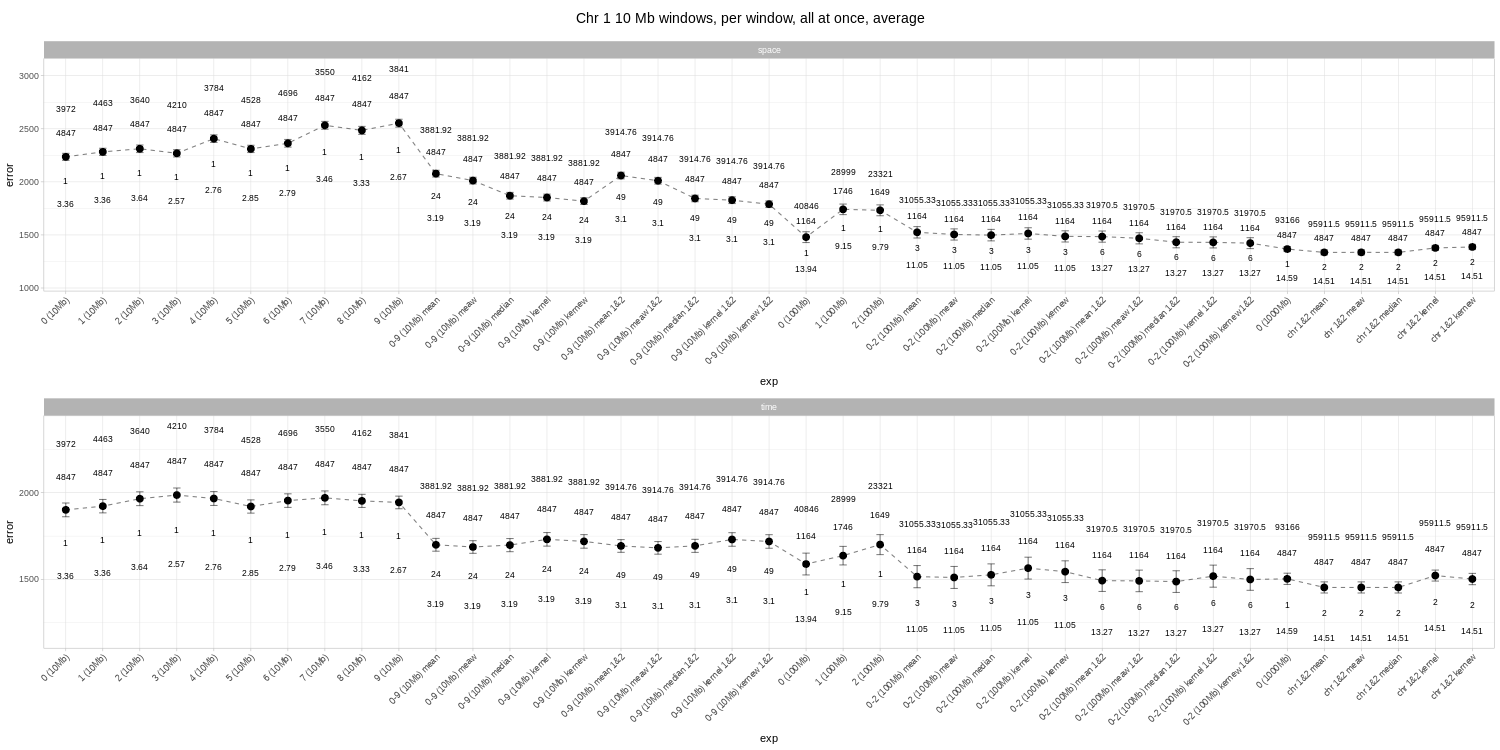

In [41]:
%%R -w 1500 -h 750

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), error_spaceNNtime_mean_windows_per_chro_df %>% ungroup(), error_spaceNNtime_mean_windows_df %>% ungroup()), 
            exp_to_plot       = c("4_1_0_10000000_all",              "4_1_10000000_20000000_all",              "4_1_20000000_30000000_all",              "4_1_30000000_40000000_all",              "4_1_40000000_50000000_all",              "4_1_50000000_60000000_all",              "4_1_60000000_70000000_all",              "4_1_70000000_80000000_all",              "4_1_80000000_90000000_all",              "4_1_90000000_100000000_all",               "4_1_0_250000000_10000000_mean",                     "4_1_0_250000000_10000000_meaw",                     "4_1_0_250000000_10000000_median",                       "4_1_0_250000000_10000000_kernel",                       "4_1_0_250000000_10000000_kernew",                       "4_all_0_250000000_10000000_mean",                         "4_all_0_250000000_10000000_meaw",                         "4_all_0_250000000_10000000_median",                           "4_all_0_250000000_10000000_kernel",                           "4_all_0_250000000_10000000_kernew",                           "2_1_0_100000000_all",               "2_1_100000000_200000000_all",               "2_1_200000000_300000000_all",               "2_1_0_300000000_100000000_mean",                      "2_1_0_300000000_100000000_meaw",                      "2_1_0_300000000_100000000_median",                        "2_1_0_300000000_100000000_kernel",                        "2_1_0_300000000_100000000_kernew",                        "2_all_0_300000000_100000000_mean",                          "2_all_0_300000000_100000000_meaw",                          "2_all_0_300000000_100000000_median",                            "2_all_0_300000000_100000000_kernel",                            "2_all_0_300000000_100000000_kernew",                            "4_1_0_1000000000_all"               , "4_all_0_1000000000_1000000000_mean"                 , "4_all_0_1000000000_1000000000_meaw"                 , "4_all_0_1000000000_1000000000_median"                   , "4_all_0_1000000000_1000000000_kernel"                   , "4_all_0_1000000000_1000000000_kernew"                   ), 
            labels            = c("4_1_0_10000000_all" = "0 (10Mb)", "4_1_10000000_20000000_all" = "1 (10Mb)", "4_1_20000000_30000000_all" = "2 (10Mb)", "4_1_30000000_40000000_all" = "3 (10Mb)", "4_1_40000000_50000000_all" = "4 (10Mb)", "4_1_50000000_60000000_all" = "5 (10Mb)", "4_1_60000000_70000000_all" = "6 (10Mb)", "4_1_70000000_80000000_all" = "7 (10Mb)", "4_1_80000000_90000000_all" = "8 (10Mb)", "4_1_90000000_100000000_all" = "9 (10Mb)",  "4_1_0_250000000_10000000_mean" = "0-9 (10Mb) mean", "4_1_0_250000000_10000000_meaw" = "0-9 (10Mb) meaw", "4_1_0_250000000_10000000_median" = "0-9 (10Mb) median", "4_1_0_250000000_10000000_kernel" = "0-9 (10Mb) kernel", "4_1_0_250000000_10000000_kernew" = "0-9 (10Mb) kernew", "4_all_0_250000000_10000000_mean" = "0-9 (10Mb) mean 1&2", "4_all_0_250000000_10000000_meaw" = "0-9 (10Mb) meaw 1&2", "4_all_0_250000000_10000000_median" = "0-9 (10Mb) median 1&2", "4_all_0_250000000_10000000_kernel" = "0-9 (10Mb) kernel 1&2", "4_all_0_250000000_10000000_kernew" = "0-9 (10Mb) kernew 1&2", "2_1_0_100000000_all" = "0 (100Mb)", "2_1_100000000_200000000_all" = "1 (100Mb)", "2_1_200000000_300000000_all" = "2 (100Mb)", "2_1_0_300000000_100000000_mean" = "0-2 (100Mb) mean", "2_1_0_300000000_100000000_meaw" = "0-2 (100Mb) meaw", "2_1_0_300000000_100000000_median" = "0-2 (100Mb) median", "2_1_0_300000000_100000000_kernel" = "0-2 (100Mb) kernel", "2_1_0_300000000_100000000_kernew" = "0-2 (100Mb) kernew", "2_all_0_300000000_100000000_mean" = "0-2 (100Mb) mean 1&2", "2_all_0_300000000_100000000_meaw" = "0-2 (100Mb) meaw 1&2", "2_all_0_300000000_100000000_median" = "0-2 (100Mb) median 1&2", "2_all_0_300000000_100000000_kernel" = "0-2 (100Mb) kernel 1&2", "2_all_0_300000000_100000000_kernew" = "0-2 (100Mb) kernew 1&2", "4_1_0_1000000000_all" = "0 (1000Mb)", "4_all_0_1000000000_1000000000_mean" = "chr 1&2 mean", "4_all_0_1000000000_1000000000_meaw" = "chr 1&2 meaw", "4_all_0_1000000000_1000000000_median" = "chr 1&2 median", "4_all_0_1000000000_1000000000_kernel" = "chr 1&2 kernel", "4_all_0_1000000000_1000000000_kernew" = "chr 1&2 kernew"), 
            limits            = c("4_1_0_10000000_all",              "4_1_10000000_20000000_all",              "4_1_20000000_30000000_all",              "4_1_30000000_40000000_all",              "4_1_40000000_50000000_all",              "4_1_50000000_60000000_all",              "4_1_60000000_70000000_all",              "4_1_70000000_80000000_all",              "4_1_80000000_90000000_all",              "4_1_90000000_100000000_all",               "4_1_0_250000000_10000000_mean",                     "4_1_0_250000000_10000000_meaw",                     "4_1_0_250000000_10000000_median",                       "4_1_0_250000000_10000000_kernel",                       "4_1_0_250000000_10000000_kernew",                       "4_all_0_250000000_10000000_mean",                         "4_all_0_250000000_10000000_meaw",                         "4_all_0_250000000_10000000_median",                           "4_all_0_250000000_10000000_kernel",                           "4_all_0_250000000_10000000_kernew",                           "2_1_0_100000000_all",               "2_1_100000000_200000000_all",               "2_1_200000000_300000000_all",               "2_1_0_300000000_100000000_mean",                      "2_1_0_300000000_100000000_meaw",                      "2_1_0_300000000_100000000_median",                        "2_1_0_300000000_100000000_kernel",                        "2_1_0_300000000_100000000_kernew",                        "2_all_0_300000000_100000000_mean",                          "2_all_0_300000000_100000000_meaw",                          "2_all_0_300000000_100000000_median",                            "2_all_0_300000000_100000000_kernel",                            "2_all_0_300000000_100000000_kernew",                            "4_1_0_1000000000_all"               , "4_all_0_1000000000_1000000000_mean"                 , "4_all_0_1000000000_1000000000_meaw"                 , "4_all_0_1000000000_1000000000_median"                   , "4_all_0_1000000000_1000000000_kernel"                   , "4_all_0_1000000000_1000000000_kernew"                   ),  
            title             = "Chr 1 10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

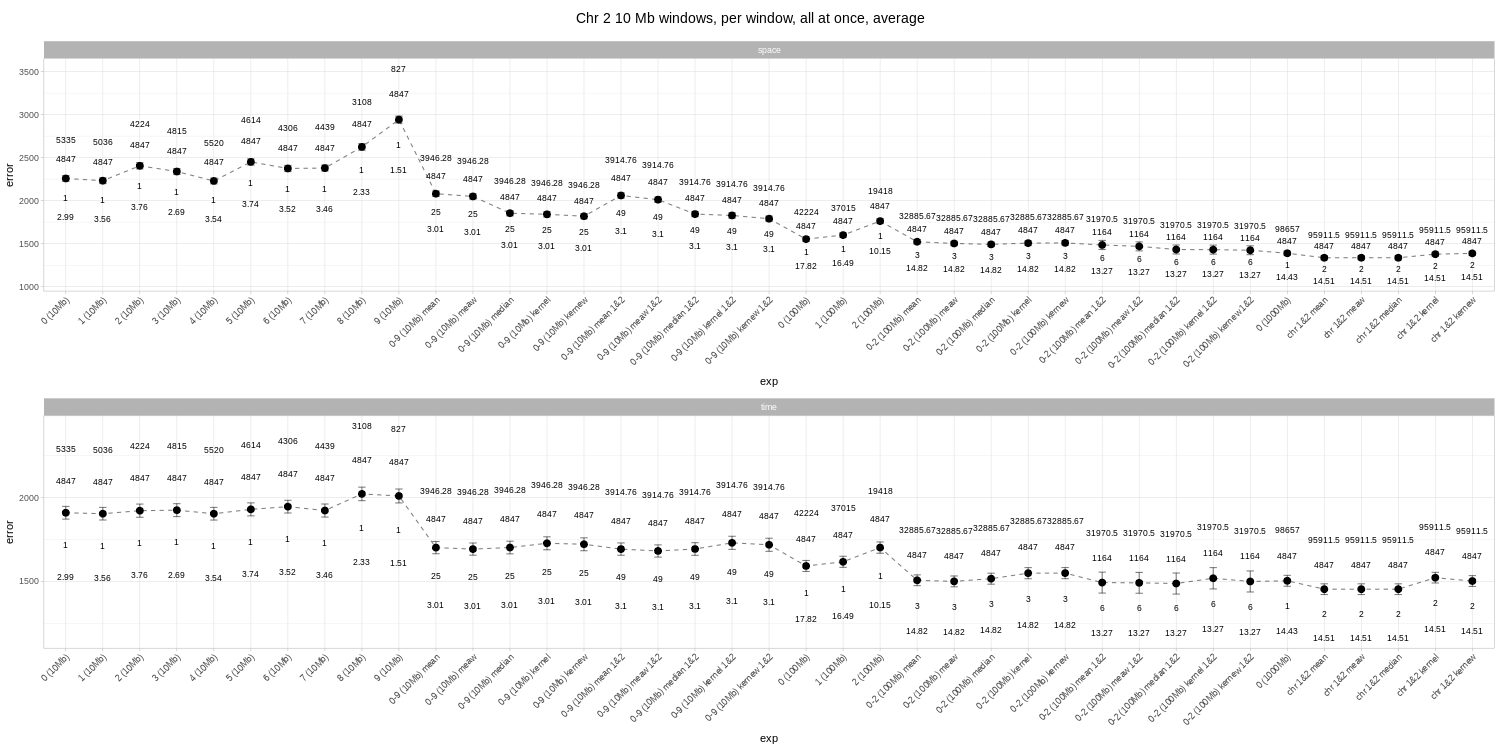

In [42]:
%%R -w 1500 -h 750

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), error_spaceNNtime_mean_windows_per_chro_df %>% ungroup(), error_spaceNNtime_mean_windows_df %>% ungroup()), 
            exp_to_plot       = c("4_2_0_10000000_all",              "4_2_10000000_20000000_all",              "4_2_20000000_30000000_all",              "4_2_30000000_40000000_all",              "4_2_40000000_50000000_all",              "4_2_50000000_60000000_all",              "4_2_60000000_70000000_all",              "4_2_70000000_80000000_all",              "4_2_80000000_90000000_all",              "4_2_90000000_100000000_all",               "4_2_0_250000000_10000000_mean",                     "4_2_0_250000000_10000000_meaw",                     "4_2_0_250000000_10000000_median",                       "4_2_0_250000000_10000000_kernel",                       "4_2_0_250000000_10000000_kernew",                       "4_all_0_250000000_10000000_mean",                         "4_all_0_250000000_10000000_meaw",                         "4_all_0_250000000_10000000_median",                           "4_all_0_250000000_10000000_kernel",                           "4_all_0_250000000_10000000_kernew",                           "2_2_0_100000000_all",               "2_2_100000000_200000000_all",               "2_2_200000000_300000000_all",               "2_2_0_300000000_100000000_mean",                      "2_2_0_300000000_100000000_meaw",                      "2_2_0_300000000_100000000_median",                        "2_2_0_300000000_100000000_kernel",                        "2_2_0_300000000_100000000_kernew",                        "2_all_0_300000000_100000000_mean",                          "2_all_0_300000000_100000000_meaw",                          "2_all_0_300000000_100000000_median",                            "2_all_0_300000000_100000000_kernel",                            "2_all_0_300000000_100000000_kernew",                            "4_2_0_1000000000_all"               , "4_all_0_1000000000_1000000000_mean"                 , "4_all_0_1000000000_1000000000_meaw"                 , "4_all_0_1000000000_1000000000_median"                   , "4_all_0_1000000000_1000000000_kernel"                   , "4_all_0_1000000000_1000000000_kernew"                   ), 
            labels            = c("4_2_0_10000000_all" = "0 (10Mb)", "4_2_10000000_20000000_all" = "1 (10Mb)", "4_2_20000000_30000000_all" = "2 (10Mb)", "4_2_30000000_40000000_all" = "3 (10Mb)", "4_2_40000000_50000000_all" = "4 (10Mb)", "4_2_50000000_60000000_all" = "5 (10Mb)", "4_2_60000000_70000000_all" = "6 (10Mb)", "4_2_70000000_80000000_all" = "7 (10Mb)", "4_2_80000000_90000000_all" = "8 (10Mb)", "4_2_90000000_100000000_all" = "9 (10Mb)",  "4_2_0_250000000_10000000_mean" = "0-9 (10Mb) mean", "4_2_0_250000000_10000000_meaw" = "0-9 (10Mb) meaw", "4_2_0_250000000_10000000_median" = "0-9 (10Mb) median", "4_2_0_250000000_10000000_kernel" = "0-9 (10Mb) kernel", "4_2_0_250000000_10000000_kernew" = "0-9 (10Mb) kernew", "4_all_0_250000000_10000000_mean" = "0-9 (10Mb) mean 1&2", "4_all_0_250000000_10000000_meaw" = "0-9 (10Mb) meaw 1&2", "4_all_0_250000000_10000000_median" = "0-9 (10Mb) median 1&2", "4_all_0_250000000_10000000_kernel" = "0-9 (10Mb) kernel 1&2", "4_all_0_250000000_10000000_kernew" = "0-9 (10Mb) kernew 1&2", "2_2_0_100000000_all" = "0 (100Mb)", "2_2_100000000_200000000_all" = "1 (100Mb)", "2_2_200000000_300000000_all" = "2 (100Mb)", "2_2_0_300000000_100000000_mean" = "0-2 (100Mb) mean", "2_2_0_300000000_100000000_meaw" = "0-2 (100Mb) meaw", "2_2_0_300000000_100000000_median" = "0-2 (100Mb) median", "2_2_0_300000000_100000000_kernel" = "0-2 (100Mb) kernel", "2_2_0_300000000_100000000_kernew" = "0-2 (100Mb) kernew", "2_all_0_300000000_100000000_mean" = "0-2 (100Mb) mean 1&2", "2_all_0_300000000_100000000_meaw" = "0-2 (100Mb) meaw 1&2", "2_all_0_300000000_100000000_median" = "0-2 (100Mb) median 1&2", "2_all_0_300000000_100000000_kernel" = "0-2 (100Mb) kernel 1&2", "2_all_0_300000000_100000000_kernew" = "0-2 (100Mb) kernew 1&2", "4_2_0_1000000000_all" = "0 (1000Mb)", "4_all_0_1000000000_1000000000_mean" = "chr 1&2 mean", "4_all_0_1000000000_1000000000_meaw" = "chr 1&2 meaw", "4_all_0_1000000000_1000000000_median" = "chr 1&2 median", "4_all_0_1000000000_1000000000_kernel" = "chr 1&2 kernel", "4_all_0_1000000000_1000000000_kernew" = "chr 1&2 kernew"), 
            limits            = c("4_2_0_10000000_all",              "4_2_10000000_20000000_all",              "4_2_20000000_30000000_all",              "4_2_30000000_40000000_all",              "4_2_40000000_50000000_all",              "4_2_50000000_60000000_all",              "4_2_60000000_70000000_all",              "4_2_70000000_80000000_all",              "4_2_80000000_90000000_all",              "4_2_90000000_100000000_all",               "4_2_0_250000000_10000000_mean",                     "4_2_0_250000000_10000000_meaw",                     "4_2_0_250000000_10000000_median",                       "4_2_0_250000000_10000000_kernel",                       "4_2_0_250000000_10000000_kernew",                       "4_all_0_250000000_10000000_mean",                         "4_all_0_250000000_10000000_meaw",                         "4_all_0_250000000_10000000_median",                           "4_all_0_250000000_10000000_kernel",                           "4_all_0_250000000_10000000_kernew",                           "2_2_0_100000000_all",               "2_2_100000000_200000000_all",               "2_2_200000000_300000000_all",               "2_2_0_300000000_100000000_mean",                      "2_2_0_300000000_100000000_meaw",                      "2_2_0_300000000_100000000_median",                        "2_2_0_300000000_100000000_kernel",                        "2_2_0_300000000_100000000_kernew",                        "2_all_0_300000000_100000000_mean",                          "2_all_0_300000000_100000000_meaw",                          "2_all_0_300000000_100000000_median",                            "2_all_0_300000000_100000000_kernel",                            "2_all_0_300000000_100000000_kernew",                            "4_2_0_1000000000_all"               , "4_all_0_1000000000_1000000000_mean"                 , "4_all_0_1000000000_1000000000_meaw"                 , "4_all_0_1000000000_1000000000_median"                   , "4_all_0_1000000000_1000000000_kernel"                   , "4_all_0_1000000000_1000000000_kernew"                   ),  
            title             = "Chr 2 10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

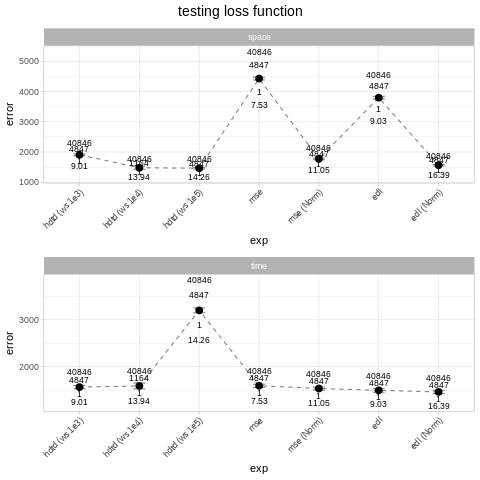

In [43]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), error_spaceNNtime_mean_windows_per_chro_df %>% ungroup(), error_spaceNNtime_mean_windows_df %>% ungroup()), 
            exp_to_plot       = c("1_1_0_100000000_all"                  , "2_1_0_100000000_all"                  ,  "3_1_0_100000000_all"                  , "21_1_0_100000000_all"        , "22_1_0_100000000_all"               , "23_1_0_100000000_all"        , "24_1_0_100000000_all"               ),
            labels            = c("1_1_0_100000000_all" = "hdtd (ws 1e3)", "2_1_0_100000000_all" = "hdtd (ws 1e4)",  "3_1_0_100000000_all" = "hdtd (ws 1e5)", "21_1_0_100000000_all" = "mse", "22_1_0_100000000_all" = "mse (Norm)", "23_1_0_100000000_all" = "edl", "24_1_0_100000000_all" = "edl (Norm)"),
            limits            = c("1_1_0_100000000_all"                  , "2_1_0_100000000_all"                  ,  "3_1_0_100000000_all"                  , "21_1_0_100000000_all"        , "22_1_0_100000000_all"               , "23_1_0_100000000_all"        , "24_1_0_100000000_all"               ),
            title             = "testing loss function", 
            xlab              = "exp", 
            ylab              = "error")

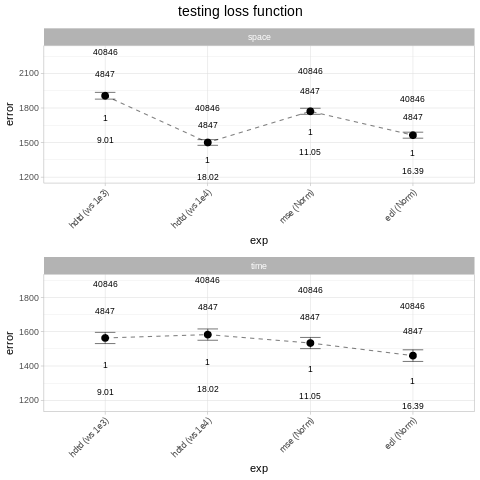

In [66]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), error_spaceNNtime_mean_windows_per_chro_df %>% ungroup(), error_spaceNNtime_mean_windows_df %>% ungroup()), 
            exp_to_plot       = c("1_1_0_100000000_all"                  , "2_1_0_100000000_all"                  , "22_1_0_100000000_all"               , "24_1_0_100000000_all"               ),
            labels            = c("1_1_0_100000000_all" = "hdtd (ws 1e3)", "2_1_0_100000000_all" = "hdtd (ws 1e4)", "22_1_0_100000000_all" = "mse (Norm)", "24_1_0_100000000_all" = "edl (Norm)"),
            limits            = c("1_1_0_100000000_all"                  , "2_1_0_100000000_all"                  , "22_1_0_100000000_all"               , "24_1_0_100000000_all"               ),
            title             = "testing loss function", 
            xlab              = "exp", 
            ylab              = "error")

In [153]:
%%R

avearge_scenarios %>% ungroup() %>%
filter(exp == "4")%>%
group_by(extendedexp) %>%
summarize(sum(n))

# A tibble: 8 × 2
  extendedexp                        `sum(n)`
  <chr>                                 <int>
1 4_1_0_100000000_100000000_mean         4668
2 4_1_0_100000000_100000000_median       4668
3 4_1_0_1000000000_1000000000_mean       1236
4 4_1_0_1000000000_1000000000_median     1236
5 4_2_0_100000000_100000000_mean         4704
6 4_2_0_100000000_100000000_median       4704
7 4_2_0_1000000000_1000000000_mean       1212
8 4_2_0_1000000000_1000000000_median     1212


In [ ]:
# A tibble: 8 × 2
  extendedexp                        `sum(n)`
  <chr>                                 <int>
1 4_1_0_ 100_ 100_mean         4668
2 4_1_0_ 100_ 100_median       4668
3 4_1_0_1000_1000_mean       1236
4 4_1_0_1000_1000_median     1236
5 4_2_0_ 100_ 100_mean         4704
6 4_2_0_ 100_ 100_median       4704
7 4_2_0_1000_1000_mean       1212
8 4_2_0_1000_1000_median     1212

In [194]:
%%R

all_scenarios %>%
ungroup() %>%
    filter(exp == 2) %>%
    select(extendedexp) %>%
    head()

# A tibble: 6 × 1
  extendedexp              
  <chr>                    
1 2_1_0_10000000_all       
2 2_1_0_10000000_all       
3 2_1_10000000_20000000_all
4 2_1_10000000_20000000_all
5 2_1_20000000_30000000_all
6 2_1_20000000_30000000_all


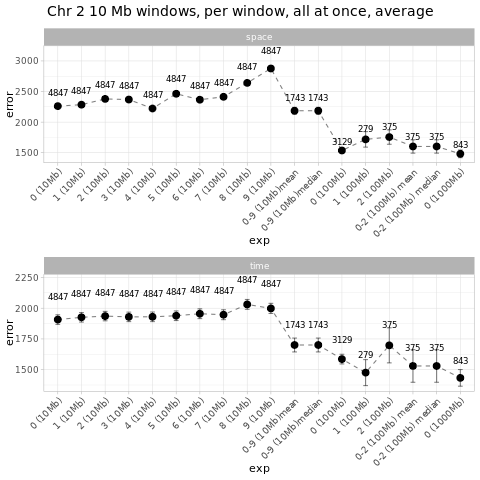

In [66]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), avearge_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_2_0_10000000_all",              "2_2_10000000_20000000_all",              "2_2_20000000_30000000_all",              "2_2_30000000_40000000_all",              "2_2_40000000_50000000_all",              "2_2_50000000_60000000_all",              "2_2_60000000_70000000_all",              "2_2_70000000_80000000_all",              "2_2_80000000_90000000_all",              "2_2_90000000_100000000_all",               "2_2_0_250000000_10000000_mean",                    "2_2_0_250000000_10000000_median",                      "4_2_0_100000000_all",               "4_2_100000000_200000000_all",               "4_2_200000000_300000000_all",               "4_2_0_300000000_100000000_mean",                      "4_2_0_300000000_100000000_median",                        "4_2_0_1000000000_all"               ), 
            labels            = c("2_2_0_10000000_all" = "0 (10Mb)", "2_2_10000000_20000000_all" = "1 (10Mb)", "2_2_20000000_30000000_all" = "2 (10Mb)", "2_2_30000000_40000000_all" = "3 (10Mb)", "2_2_40000000_50000000_all" = "4 (10Mb)", "2_2_50000000_60000000_all" = "5 (10Mb)", "2_2_60000000_70000000_all" = "6 (10Mb)", "2_2_70000000_80000000_all" = "7 (10Mb)", "2_2_80000000_90000000_all" = "8 (10Mb)", "2_2_90000000_100000000_all" = "9 (10Mb)",  "2_2_0_250000000_10000000_mean" = "0-9 (10Mb)mean", "2_2_0_250000000_10000000_median" = "0-9 (10Mb)median", "4_2_0_100000000_all" = "0 (100Mb)", "4_2_100000000_200000000_all" = "1 (100Mb)", "4_2_200000000_300000000_all" = "2 (100Mb)", "4_2_0_300000000_100000000_mean" = "0-2 (100Mb) mean", "4_2_0_300000000_100000000_median" = "0-2 (100Mb) median", "4_2_0_1000000000_all" = "0 (1000Mb)"), 
            limits            = c("2_2_0_10000000_all",              "2_2_10000000_20000000_all",              "2_2_20000000_30000000_all",              "2_2_30000000_40000000_all",              "2_2_40000000_50000000_all",              "2_2_50000000_60000000_all",              "2_2_60000000_70000000_all",              "2_2_70000000_80000000_all",              "2_2_80000000_90000000_all",              "2_2_90000000_100000000_all",               "2_2_0_250000000_10000000_mean",                    "2_2_0_250000000_10000000_median",                      "4_2_0_100000000_all",               "4_2_100000000_200000000_all",               "4_2_200000000_300000000_all",               "4_2_0_300000000_100000000_mean",                      "4_2_0_300000000_100000000_median",                        "4_2_0_1000000000_all"               ),  
            title             = "Chr 2 10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

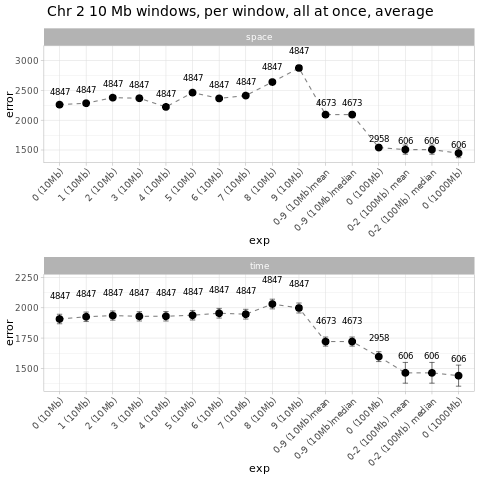

In [130]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), avearge_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_2_0_10000000_all",              "2_2_10000000_20000000_all",              "2_2_20000000_30000000_all",              "2_2_30000000_40000000_all",              "2_2_40000000_50000000_all",              "2_2_50000000_60000000_all",              "2_2_60000000_70000000_all",              "2_2_70000000_80000000_all",              "2_2_80000000_90000000_all",              "2_2_90000000_100000000_all",               "2_2_0_100000000_mean",                    "2_2_0_100000000_median",                      "4_2_0_100000000_all",               "4_2_0_1000000000_mean",                      "4_2_0_1000000000_median",                        "4_2_0_1000000000_all"               ), 
            labels            = c("2_2_0_10000000_all" = "0 (10Mb)", "2_2_10000000_20000000_all" = "1 (10Mb)", "2_2_20000000_30000000_all" = "2 (10Mb)", "2_2_30000000_40000000_all" = "3 (10Mb)", "2_2_40000000_50000000_all" = "4 (10Mb)", "2_2_50000000_60000000_all" = "5 (10Mb)", "2_2_60000000_70000000_all" = "6 (10Mb)", "2_2_70000000_80000000_all" = "7 (10Mb)", "2_2_80000000_90000000_all" = "8 (10Mb)", "2_2_90000000_100000000_all" = "9 (10Mb)",  "2_2_0_100000000_mean" = "0-9 (10Mb)mean", "2_2_0_100000000_median" = "0-9 (10Mb)median", "4_2_0_100000000_all" = "0 (100Mb)", "4_2_0_1000000000_mean" = "0-2 (100Mb) mean", "4_2_0_1000000000_median" = "0-2 (100Mb) median", "4_2_0_1000000000_all" = "0 (1000Mb)"), 
            limits            = c("2_2_0_10000000_all",              "2_2_10000000_20000000_all",              "2_2_20000000_30000000_all",              "2_2_30000000_40000000_all",              "2_2_40000000_50000000_all",              "2_2_50000000_60000000_all",              "2_2_60000000_70000000_all",              "2_2_70000000_80000000_all",              "2_2_80000000_90000000_all",              "2_2_90000000_100000000_all",               "2_2_0_100000000_mean",                    "2_2_0_100000000_median",                      "4_2_0_100000000_all",               "4_2_0_1000000000_mean",                      "4_2_0_1000000000_median",                        "4_2_0_1000000000_all"               ),  
            title             = "Chr 2 10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

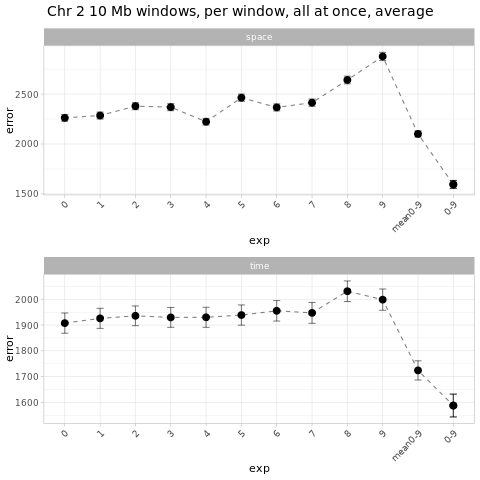

In [26]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_2_0_10000000",       "2_2_10000000_20000000",       "2_2_20000000_30000000",       "2_2_30000000_40000000",       "2_2_40000000_50000000",       "2_2_50000000_60000000",       "2_2_60000000_70000000",       "2_2_70000000_80000000",       "2_2_80000000_90000000",       "2_2_90000000_100000000",        "2_2_0_100000000",             "4_2_0_100000000"        ), 
            labels            = c("2_2_0_10000000" = "0", "2_2_10000000_20000000" = "1", "2_2_20000000_30000000" = "2", "2_2_30000000_40000000" = "3", "2_2_40000000_50000000" = "4", "2_2_50000000_60000000" = "5", "2_2_60000000_70000000" = "6", "2_2_70000000_80000000" = "7", "2_2_80000000_90000000" = "8", "2_2_90000000_100000000" = "9",  "2_2_0_100000000" = "mean0-9", "4_2_0_100000000" = "0-9"), 
            limits            = c("2_2_0_10000000",       "2_2_10000000_20000000",       "2_2_20000000_30000000",       "2_2_30000000_40000000",       "2_2_40000000_50000000",       "2_2_50000000_60000000",       "2_2_60000000_70000000",       "2_2_70000000_80000000",       "2_2_80000000_90000000",       "2_2_90000000_100000000",        "2_2_0_100000000",             "4_2_0_100000000"        ),  
            title             = "Chr 2 10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

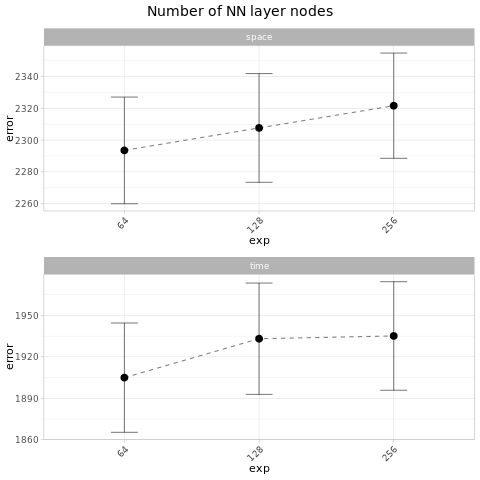

In [48]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_10000000_20000000"       , "7_1_10000000_20000000"        , "8_1_10000000_20000000"        ), 
            labels            = c("2_1_10000000_20000000" = "64", "7_1_10000000_20000000" = "128", "8_1_10000000_20000000" = "256"), 
            limits            = c("2_1_10000000_20000000"       , "7_1_10000000_20000000"        , "8_1_10000000_20000000"        ),  
            title             = "Number of NN layer nodes", 
            xlab              = "exp", 
            ylab              = "error")

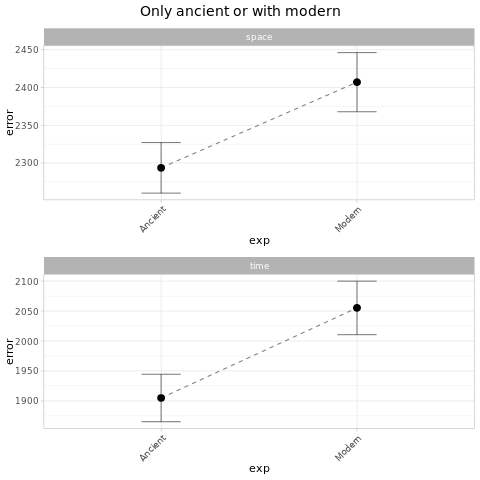

In [49]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_10000000_20000000"            , "9_1_10000000_20000000"           ), 
            labels            = c("2_1_10000000_20000000" = "Ancient", "9_1_10000000_20000000" = "Modern"), 
            limits            = c("2_1_10000000_20000000"            , "9_1_10000000_20000000"           ),  
            title             = "Only ancient or with modern", 
            xlab              = "exp", 
            ylab              = "error")

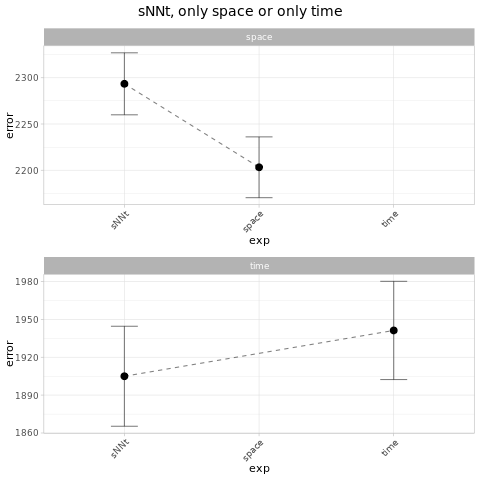

In [50]:
%%R

plot_errors(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup()), 
            exp_to_plot       = c("2_1_10000000_20000000"         , "5_1_10000000_20000000"          , "6_1_10000000_20000000"           ), 
            labels            = c("2_1_10000000_20000000" = "sNNt", "5_1_10000000_20000000" = "space", "6_1_10000000_20000000" = "time"), 
            limits            = c("2_1_10000000_20000000"         , "5_1_10000000_20000000"          , "6_1_10000000_20000000"           ),  
            title             = "sNNt, only space or only time", 
            xlab              = "exp", 
            ylab              = "error")

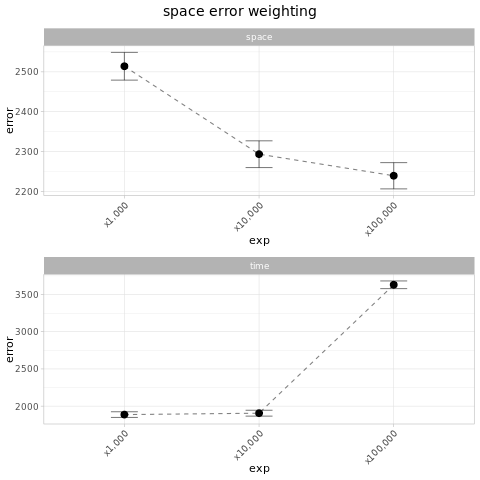

In [51]:
%%R

plot_errors(all_scenarios_all = all_scenarios, 
            exp_to_plot       = c("1_1_10000000_20000000",       "2_1_10000000_20000000",       "3_1_10000000_20000000"), 
            labels            = c("1_1_10000000_20000000" = "x1,000", "2_1_10000000_20000000" = "x10,000", "3_1_10000000_20000000" = "x100,000"), 
            limits            = c("1_1_10000000_20000000",       "2_1_10000000_20000000",       "3_1_10000000_20000000"),  
            title             = "space error weighting", 
            xlab              = "exp", 
            ylab              = "error")

In [52]:
%%R

plot_errors_tims <- function(all_scenarios_all, exp_to_plot, labels, limits, title, xlab, ylab, ylimspace = c("None", "None"), ylimtime = c("None", "None"), nolegend = TRUE){
    
    all_scenarios_all %>% 
        filter(extendedexp %in% exp_to_plot,
               stat == "time") %>%
        ggplot() +
        geom_errorbar(aes(x = extendedexp, ymin = mean-se, ymax = mean+se), alpha = 0.5, width = 0.2) +
        geom_line(aes(x = extendedexp, y = mean, group = 1), alpha = 0.5, linetype = "dashed") +
        geom_point(aes(x = extendedexp, y = mean), size = 3) +
        labs(x = xlab, y = ylab) +
        scale_x_discrete(labels=labels, limits = limits) +
        facet_wrap(stat~., nrow = 2, scales = "free") +
        theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        theme_light() -> plot2
    
    if(ylimtime[1] != "None"){
        plot2 + coord_cartesian(ylim = ylimtime) -> plot2
    }
    if(nolegend){
        plot2 + theme(legend.position = 'none', axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) -> plot2
    }
    
    title <- ggdraw() + draw_label(title)
    
    plot_grid(title, plot2, ncol = 1, rel_heights=c(0.1, 1))

}

In [53]:
%%R

all_scenarios %>% filter(exp == 12)

# A tibble: 1 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [1]
  exp     cro      sta      end extendedexp  nam   typ   stat   mean    se     n
  <fct> <int>    <int>    <int> <chr>        <chr> <chr> <chr> <dbl> <dbl> <int>
1 12        1 10000000 20000000 12_1_100000… tims… gt    time  1208.  23.1  2134


In [54]:
%%R

mean_scenarios %>% filter(exp == 14) 

# A tibble: 2 × 11
# Groups:   exp, cro, sta, end, extendedexp, nam, typ [1]
    exp   cro   sta        end extendedexp   nam   typ   stat   mean    se     n
  <int> <int> <int>      <int> <chr>         <chr> <chr> <chr> <dbl> <dbl> <int>
1    14     1     0 1000000000 14_1_0_10000… mean  gt    space    0    0    2827
2    14     1     0 1000000000 14_1_0_10000… mean  gt    time  1045.  18.3  2827


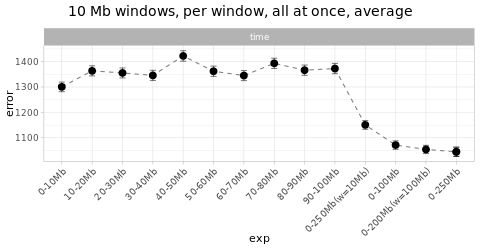

In [55]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ), 
            labels            = c("10_1_0_10000000" = "0-10Mb", "10_1_10000000_20000000" = "10-20Mb", "10_1_20000000_30000000" = "20-30Mb", "10_1_30000000_40000000" = "30-40Mb", "10_1_40000000_50000000" = "40-50Mb", "10_1_50000000_60000000" = "50-60Mb", "10_1_60000000_70000000" = "60-70Mb", "10_1_70000000_80000000" = "70-80Mb", "10_1_80000000_90000000" = "80-90Mb", "10_1_90000000_100000000" = "90-100Mb", "10_1_0_250000000" = "0-250Mb(w=10Mb)", "11_1_0_100000000" = "0-100Mb", "11_1_0_200000000" = "0-200Mb(w=100Mb)", "14_1_0_1000000000" = "0-250Mb"), 
            limits            = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ),  
            title             = "10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

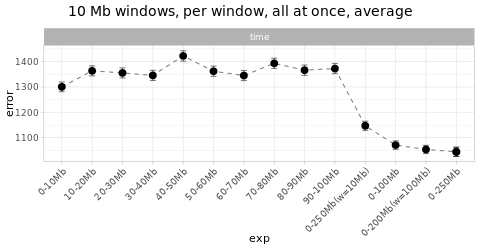

In [56]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), median_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ), 
            labels            = c("10_1_0_10000000" = "0-10Mb", "10_1_10000000_20000000" = "10-20Mb", "10_1_20000000_30000000" = "20-30Mb", "10_1_30000000_40000000" = "30-40Mb", "10_1_40000000_50000000" = "40-50Mb", "10_1_50000000_60000000" = "50-60Mb", "10_1_60000000_70000000" = "60-70Mb", "10_1_70000000_80000000" = "70-80Mb", "10_1_80000000_90000000" = "80-90Mb", "10_1_90000000_100000000" = "90-100Mb", "10_1_0_250000000" = "0-250Mb(w=10Mb)", "11_1_0_100000000" = "0-100Mb", "11_1_0_200000000" = "0-200Mb(w=100Mb)", "14_1_0_1000000000" = "0-250Mb"), 
            limits            = c("10_1_0_10000000",            "10_1_10000000_20000000",             "10_1_20000000_30000000",             "10_1_30000000_40000000",             "10_1_40000000_50000000",             "10_1_50000000_60000000",             "10_1_60000000_70000000",             "10_1_70000000_80000000",             "10_1_80000000_90000000",             "10_1_90000000_100000000",              "10_1_0_250000000",                     "11_1_0_100000000",             "11_1_0_200000000",                      "14_1_0_1000000000"            ),  
            title             = "10 Mb windows, per window, all at once, average", 
            xlab              = "exp", 
            ylab              = "error")

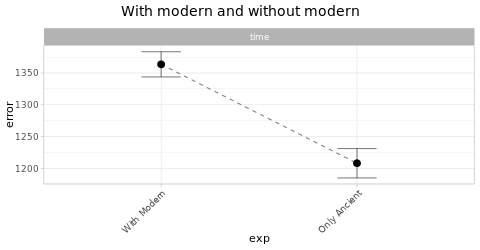

In [57]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_10000000_20000000",                 "12_1_10000000_20000000"                 ),  
            labels            = c("10_1_10000000_20000000" = "With Modern", "12_1_10000000_20000000" = "Only Ancient"), 
            limits            = c("10_1_10000000_20000000",                 "12_1_10000000_20000000"                 ),  
            title             = "With modern and without modern", 
            xlab              = "exp", 
            ylab              = "error")

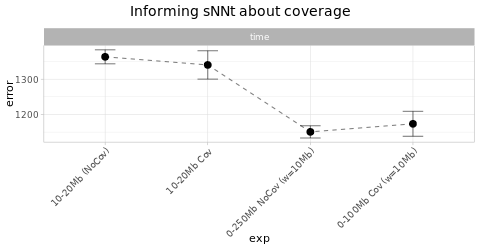

In [58]:
%%R -h 250

plot_errors_tims(all_scenarios_all = rbind(all_scenarios %>% ungroup(), mean_scenarios %>% ungroup() %>% filter(! extendedexp == "11_1_0_100000000")), 
            exp_to_plot       = c("10_1_10000000_20000000",                     "13_1_10000000_20000000"                , "10_1_0_250000000",                          "13_1_0_100000000"),  
            labels            = c("10_1_10000000_20000000" = "10-20Mb (NoCov)", "13_1_10000000_20000000" = "10-20Mb Cov", "10_1_0_250000000" = "0-250Mb NoCov (w=10Mb)", "13_1_0_100000000" = "0-100Mb Cov (w=10Mb)"), 
            limits            = c("10_1_10000000_20000000",                     "13_1_10000000_20000000"                , "10_1_0_250000000",                          "13_1_0_100000000"),  
            title             = "Informing sNNt about coverage", 
            xlab              = "exp", 
            ylab              = "error")

In [59]:
%%bash

wc -l ../../files/AADR_filtered_metadata.txt

16467 ../../files/AADR_filtered_metadata.txt


In [60]:
%%R

read.table("../../sandbox/AADR/14/pred_1_0_1000000000.txt", header = T) %>% head()

   sim exp  nam typ cro sta        end gro          ind  idx   snp      run
1 AADR  14 tims  gt   1   0 1000000000   0       OBR004  566 93166 5.516302
2 AADR  14 tims  gt   1   0 1000000000   0       SCH009 1529 93166 5.516302
3 AADR  14 tims  gt   1   0 1000000000   0 NE5_noUDG.SG 1934 93166 5.516302
4 AADR  14 tims  gt   1   0 1000000000   1   NA18530.SG  250 93166 7.481417
5 AADR  14 tims  gt   1   0 1000000000   1        I6937 2136 93166 7.481417
6 AADR  14 tims  gt   1   0 1000000000   1   HG03857.SG 4216 93166 7.481417
  true_tim   pred_tim   diff_time
1     4512 4058.85860   453.14136
2     7050 5833.93000  1216.06982
3     7058 4096.92300  2961.07715
4        0  -36.61932    36.61932
5      188 3509.29150 -3321.29150
6        0   11.24456   -11.24456


In [61]:
%%R


read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% head()

   sim exp       nam typ cro sta       end gro                ind  idx   snp
1 AADR   4 allwindow  gt   1   0 100000000   0             I13840   26 40846
2 AADR   4 allwindow  gt   1   0 100000000   0             I15969  827 40846
3 AADR   4 allwindow  gt   1   0 100000000   0      DA13_noUDG.SG 2131 40846
4 AADR   4 allwindow  gt   1   0 100000000   1 s19_X20_1_noUDG.SG 1189 40846
5 AADR   4 allwindow  gt   1   0 100000000   1     CR-01_noUDG.SG 4163 40846
6 AADR   4 allwindow  gt   1   0 100000000   1          R11833.SG 4740 40846
       run true_lat   true_lon pred_lat  pred_lon diff_space true_tim pred_tim
1 12.42778 40.67111   20.98472 42.00846  14.37418  571.40063     6102 5003.010
2 12.42778 18.45100  -69.68600 18.15435 -69.70998   33.08282      995  888.078
3 12.42778 49.06065   75.50320 48.46994  81.07380  413.44055     2568 2130.256
4 16.41617 59.43080   24.90890 52.92200  28.32079  753.67510     2787 2218.277
5 16.41617 34.00361 -119.72639 20.93751 -88.02425 3429.48780     1

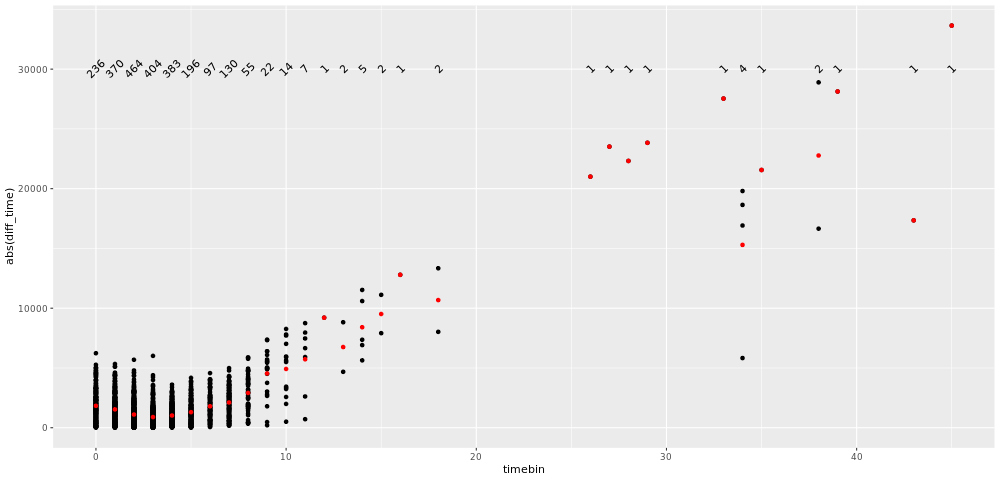

In [62]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    mutate(timebin = trunc(true_tim/1000)) %>%
    ggplot() +
    geom_point(aes(x = timebin, y = abs(diff_time))) +
    geom_point(data = . %>% group_by(timebin) %>% summarize(mean_diff_time = mean(abs(diff_time))), aes(x = timebin, y = mean_diff_time), color = "red") +
    geom_text(data = . %>% group_by(timebin) %>% summarize(n = n()), aes(x = timebin, y = 30000, label = n), angle = 45)

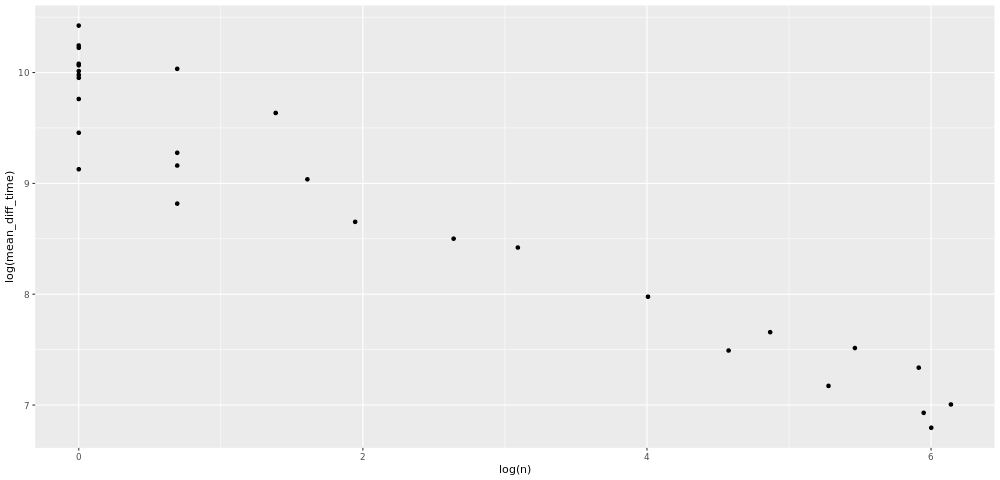

In [63]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    mutate(timebin = trunc(true_tim/1000)) %>%
    group_by(timebin) %>% 
    summarize(n = n(), mean_diff_time = mean(abs(diff_time))) %>%
    ggplot() +
    geom_point(aes(x = log(n), y = log(mean_diff_time)) )

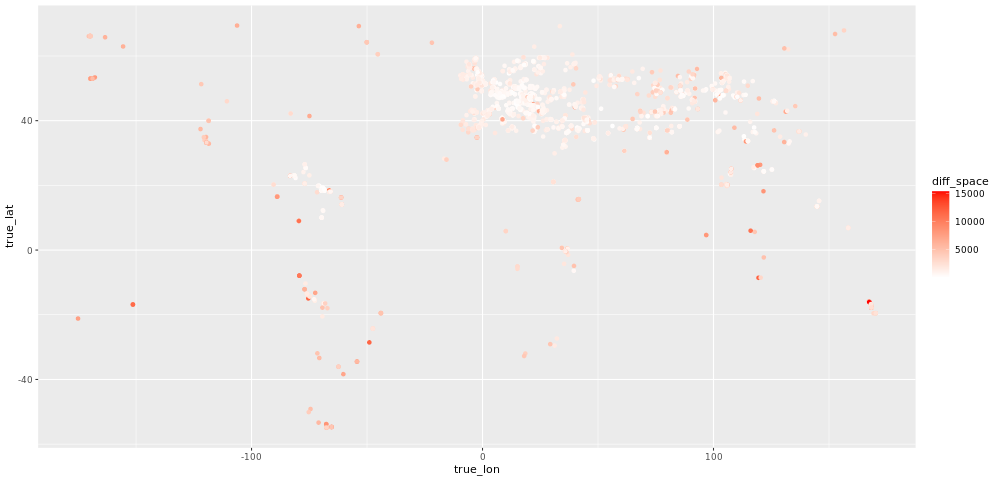

In [64]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    filter(true_tim > 0, ) %>%
    ggplot() +
    geom_point(aes(x = true_lon, y = true_lat, color = diff_space)) +
    scale_color_gradient2(low = "blue", 
                         mid = "white", 
                         high = "red", 
                         midpoint = 0)

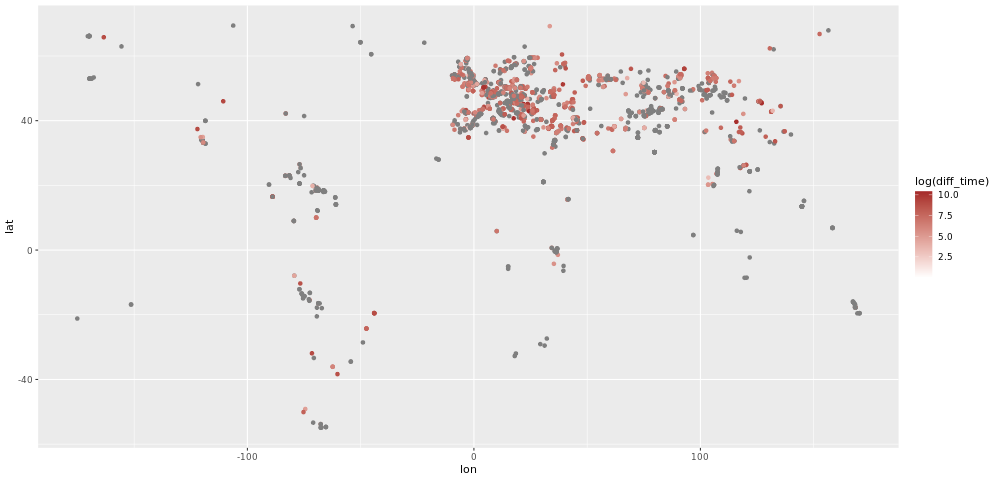

In [65]:
%%R -w 1000

read.table("../../sandbox/AADR/4/pred_1_0_100000000.txt", header = T) %>% 
    left_join(read.csv("../../files/AADR_filtered_metadata.txt", header = T, sep = "\t") %>% select(ind = indivi, lat = latitu, lon = longit), by = c("ind")) %>%
    mutate(lon = as.numeric(as.character(lon)),
           lat = as.numeric(as.character(lat))) %>%
    ggplot() +
    geom_jitter(aes(x = lon, y = lat, color = log(diff_time))) +
    scale_color_gradient2(low = "blue", 
                         mid = "white", 
                         high = "brown", 
                         midpoint = 0)

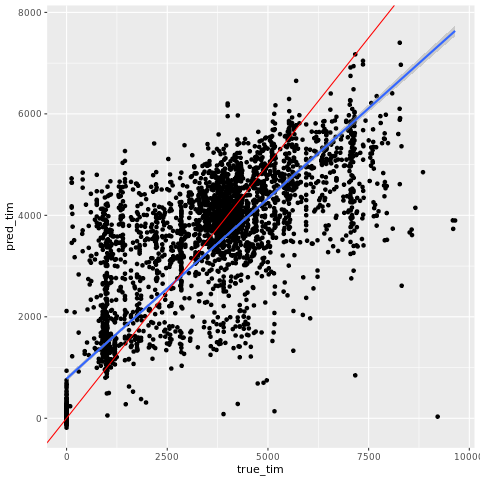

In [66]:
%%R

read.table("../../sandbox/AADR/14/pred_1_0_1000000000.txt", header = T) %>%
    ggplot() +
    geom_point(aes(x = true_tim, y = pred_tim)) +
    geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true_tim, y = pred_tim))+
    geom_abline(intercept = 0, slope = 1, color = "red")

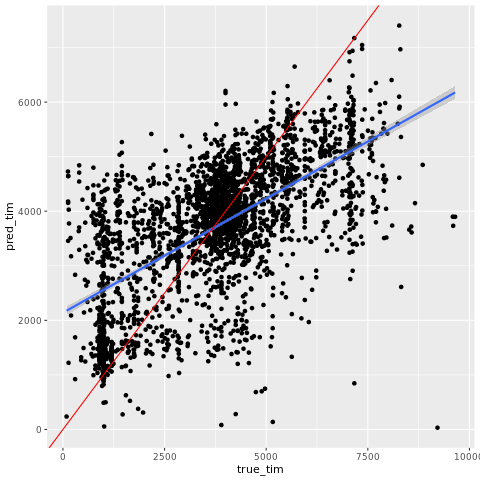

In [67]:
%%R

read.table("../../sandbox/AADR/14/pred_1_0_1000000000.txt", header = T) %>%
    filter(true_tim > 0) %>%
    ggplot() +
    geom_point(aes(x = true_tim, y = pred_tim)) +
    geom_smooth(method = "lm", formula = 'y ~ x', aes(x = true_tim, y = pred_tim))+
    geom_abline(intercept = 0, slope = 1, color = "red")